In [153]:
import networkx as nx

### Graphs

In [154]:
# undirected graph
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('B', 'C')

In [155]:
# directed graph
G = nx.DiGraph()
G.add_edge('B', 'A')
G.add_edge('B', 'C')

In [156]:
# weighted graph
G = nx.Graph()
G.add_edge('A', 'B', weight = 6)

In [157]:
# signed graph
G = nx.Graph()
G.add_edge('A', 'B', sign = '+')
G.add_edge('C', 'B', sign = '-')

In [158]:
# labeled graph
G = G = nx.Graph()
G.add_edge('A', 'B', relation = 'friend')
G.add_edge('D', 'B', relation = 'family')

In [159]:
# multigraph
G = nx.MultiGraph()
G.add_edge('A', 'B', relation = 'friend')
G.add_edge('A', 'B', relation = 'neighbor'); 

In [160]:
# directed multigraph
G = nx.MultiDiGraph()

### Attributes

In [161]:
# labeled graph
G = G = nx.Graph()
G.add_edge('A', 'B', relation = 'friend', weight = 5)
G.add_edge('C', 'B', relation = 'coworker', sign = '+')
G.add_edge('D', 'B', relation = 'family')

In [162]:
list(G.edges())

[('A', 'B'), ('B', 'C'), ('B', 'D')]

In [163]:
list(G.edges(data=True))

[('A', 'B', {'relation': 'friend', 'weight': 5}),
 ('B', 'C', {'relation': 'coworker', 'sign': '+'}),
 ('B', 'D', {'relation': 'family'})]

In [164]:
G.edges['A', 'B']

{'relation': 'friend', 'weight': 5}

In [165]:
G.edges['A', 'B']['weight']

5

In [166]:
# MultiGraph
G = nx.MultiGraph()
G.add_edge('A', 'B', relation = 'friend')
G.add_edge('A', 'B', relation = 'neighbor')

1

In [167]:
G.edges['A', 'B', 0]

{'relation': 'friend'}

In [168]:
G.edges['A', 'B', 1]

{'relation': 'neighbor'}

In [169]:
G.add_node('A', role = 'trader')

In [170]:
G.add_node('B', role = 'manager')

In [171]:
G.nodes()

NodeView(('A', 'B'))

In [172]:
G.nodes(data = True)

NodeDataView({'A': {'role': 'trader'}, 'B': {'role': 'manager'}})

In [173]:
G.nodes['A']

{'role': 'trader'}

### Bipartite graph
#### Let $L$ and $R$ be disjoint sets. Node $x \in L$ can be connected to node $y \iff y \in R$

In [174]:
from networkx.algorithms import bipartite

In [175]:
B = nx.Graph()

In [176]:
B.add_nodes_from(['A', 'B', 'C', 'D', 'E'], bipartite = 0)

In [177]:
B.add_nodes_from([1, 2, 3, 4], bipartite = 1)

In [178]:
B.add_edges_from([('A', 1), ('B', 1), ('C', 1), ('C', 3), ('D', 2), ('E', 3), ('E', 4)])

In [179]:
bipartite.is_bipartite(B)

True

In [180]:
B.add_edge('A', 'B')
bipartite.is_bipartite(B)

False

In [181]:
B.remove_edge('A', 'B')

In [182]:
X = set([1, 2, 3, 4])

In [183]:
bipartite.is_bipartite_node_set(B, X)

True

In [184]:
# L-Bipartite graph projection
# connects nodes from set L if they have a common edge with a node in R
P = bipartite.projected_graph(B, X)

In [185]:
P.edges(data=True)

EdgeDataView([(1, 3, {}), (3, 4, {})])

In [186]:
# L-Bipartite weighted graph projection
# weight is proportional to number of common edges
P = bipartite.weighted_projected_graph(B, X)

In [187]:
P.edges(data=True)

EdgeDataView([(1, 3, {'weight': 1}), (3, 4, {'weight': 1})])

### Loading Graphs

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

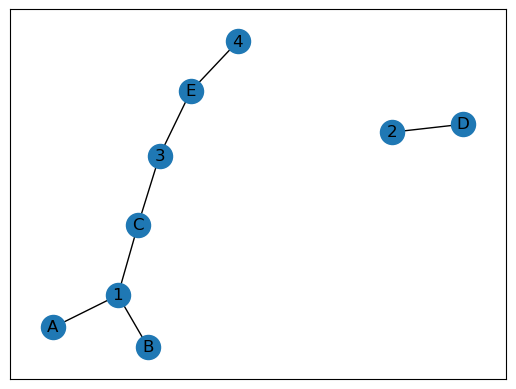

In [194]:
nx.draw_networkx(B)

In [195]:
!cat G_adjlist.txt

0 1 2 3 5
1 3 6
2
3 4
4 5 7
5 8
6
7
8 9
9


In [197]:
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (4, 7), (8, 9)])

In [198]:
adj_matrix = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G3 = nx.Graph(adj_matrix)
G3.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (4, 5), (4, 7), (5, 8), (8, 9)])

In [199]:
!cat G_edgelist.txt

0 1 4
0 2 3
0 3 2
0 5 6
1 3 2
1 6 5
3 4 3
4 5 1
4 7 2
5 8 6
8 9 1


In [200]:
G4 = nx.read_edgelist('G_edgelist.txt', data=[('Weight', int)])

G4.edges(data=True)

EdgeDataView([('0', '1', {'Weight': 4}), ('0', '2', {'Weight': 3}), ('0', '3', {'Weight': 2}), ('0', '5', {'Weight': 6}), ('1', '3', {'Weight': 2}), ('1', '6', {'Weight': 5}), ('3', '4', {'Weight': 3}), ('5', '4', {'Weight': 1}), ('5', '8', {'Weight': 6}), ('4', '7', {'Weight': 2}), ('8', '9', {'Weight': 1})])

In [201]:
G_df = pd.read_csv('G_edgelist.txt', delim_whitespace=True, 
                   header=None, names=['n1', 'n2', 'weight'])
G_df

,n1,n2,weight
0,0,1,4
1,0,2,3
2,0,3,2
3,0,5,6
4,1,3,2
5,1,6,5
6,3,4,3
7,4,5,1
8,4,7,2
9,5,8,6


In [202]:
G5 = nx.from_pandas_edgelist(G_df, 'n1', 'n2', edge_attr='weight')
G5.edges(data=True)

EdgeDataView([(0, 1, {'weight': 4}), (0, 2, {'weight': 3}), (0, 3, {'weight': 2}), (0, 5, {'weight': 6}), (1, 3, {'weight': 2}), (1, 6, {'weight': 5}), (3, 4, {'weight': 3}), (5, 4, {'weight': 1}), (5, 8, {'weight': 6}), (4, 7, {'weight': 2}), (8, 9, {'weight': 1})])

In [204]:
chess = nx.read_edgelist('chess_graph.txt', data=[('outcome', int), ('timestamp', float)], 
                         create_using=nx.MultiDiGraph())

In [205]:
list(chess.edges(data=True))[0:10]

[('1', '2', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '3', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '4', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '5', {'outcome': 1, 'timestamp': 885635999.999997}),
 ('1', '6', {'outcome': 0, 'timestamp': 885635999.999997}),
 ('1', '807', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('1', '454', {'outcome': 0, 'timestamp': 896148000.000003}),
 ('1', '827', {'outcome': 0, 'timestamp': 901403999.999997}),
 ('1', '1240', {'outcome': 0, 'timestamp': 906660000.0}),
 ('1', '680', {'outcome': 0, 'timestamp': 906660000.0})]

In [207]:
games_played = chess.degree() # num edges
list(games_played)[0:10]

[('1', 48),
 ('2', 112),
 ('3', 85),
 ('4', 12),
 ('5', 18),
 ('6', 95),
 ('7', 9),
 ('8', 20),
 ('9', 142),
 ('10', 4)]